# Exploratory Data Analysis


In [1]:
import numpy as np
import pandas as pd
import os.path
import matplotlib.pyplot as plt
%matplotlib inline


## Build a Data Frame:
The following function builds a data frame using the attribute information (from the guide file) and the actual data. 
It has the capability of building a dictionary for multiple years if needed.

In [2]:
#sam_year = [1995,1996]
def build_Datadict(yr):
    fname = str(yr) + '/LinkCO' + str(yr)[2:4] + 'USDen.dat'
    #path_name = os.path.abspath('ReadingData/' + str(yr) + fname)
    path_name = os.path.join('ReadingData/',fname)
    print(path_name)
    infl = pd.read_table(path_name,'r',header=None)
    ofl1=pd.read_csv('%s.out.txt' % yr,'r',header=None)
    ofl2=pd.read_csv('%s.out2.txt' % yr,'r',header=None)
    ofl3=pd.read_csv('%s.colname' % yr,'r',header=None)
    a_name = 'a_{}'.format(yr) 
    a_name = {}
    for ind in range(len(ofl3.index)):
        a_name[ofl3[0][ind]]=(infl.iloc[:,0].str.slice(ofl1.iat[ind,0],ofl2.iat[ind,0]))
    df = pd.DataFrame(a_name)
    return df

yrList = [2008]
def Datadict_drive(yrList):
    d={}
    for yr in yrList:
        d['%s' % yr] = build_Datadict(yr)
    return d
dd = Datadict_drive(yrList)

ReadingData/2008/LinkCO08USDen.dat


## General Information

Let's look at the dataset

In [3]:
data_2008 = dd['2008'] #If we have multiple years we can insert the relevant year instead of '2008'
data_2008.tail(5)

,AB_ANTI,AB_AVEN1,AB_AVEN6,AB_BINJ,AB_NICU,AB_SEIZ,AB_SURF,AGED,AGER22,AGER5,...,UOP_INDUC,UOP_TOCOL,UPREVIS,URF_CHYPER,URF_DIAB,URF_ECLAM,URF_PHYPER,WEEKDAYD,WTGAIN,WTGAIN_REC
4255183,N,N,N,N,N,N,N,,,,...,2,2,12,2,2,2,2,,00,1
4255184,N,N,N,N,N,N,N,,,,...,2,2,12,2,2,2,2,,10,1
4255185,N,N,N,N,N,N,N,,,,...,2,2,12,2,2,2,2,,10,1
4255186,N,N,N,N,N,N,N,,,,...,2,2,11,2,2,2,2,,37,6
4255187,N,N,N,N,N,N,N,,,,...,2,2,10,2,2,2,2,,50,8


Have a look at the size of the data set (records/attributes)

In [4]:
data_2008.shape

(4255188, 182)

In [5]:
attribute_list = list(data_2008.columns.str.strip()) #strip in case some of the column names have spaces around them.
print(attribute_list)

['AB_ANTI', 'AB_AVEN1', 'AB_AVEN6', 'AB_BINJ', 'AB_NICU', 'AB_SEIZ', 'AB_SURF', 'AGED', 'AGER22', 'AGER5', 'APGAR5', 'APGAR5R', 'ATTEND', 'AUTOPSY', 'BFACIL', 'BFACIL3', 'BRTHWGT', 'BWTIMP', 'BWTR14', 'BWTR4B', 'CA_ANEN', 'CA_CCHD', 'CA_CDH', 'CA_CLEFT', 'CA_CLPAL', 'CA_DISOR', 'CA_DOWN', 'CA_GAST', 'CA_HYPO', 'CA_LIMB', 'CA_MNSB', 'CA_OMPH', 'CIGS', 'CIG_1', 'CIG_2', 'CIG_3', 'CIG_REC', 'CNTOCFIPD', 'CNTRSPPD', 'CNTYRFPD', 'COMBGEST', 'DFPC_IMP', 'DISPO', 'DLLB_MM', 'DLLB_YY', 'DLMP_DD', 'DLMP_MM', 'DLMP_YY', 'DMETH_REC', 'DOB_MM', 'DOB_WK', 'DOB_YY', 'DOD_MM', 'DPLURAL', 'DRCNTY', 'DTHYR', 'EANUM', 'ENTITY', 'ESTGEST', 'FAGECOMB', 'FAGEREC11', 'FAGERPT_FLG', 'FBRACE', 'FILLER', 'FLGND', 'FRACEHISP', 'FRACEREC', 'GESTREC10', 'GESTREC3', 'GEST_IMP', 'HOSPD', 'IMP_PLUR', 'IMP_SEX', 'LATEREC', 'LBO', 'LD_ANES', 'LD_ANTI', 'LD_AUGM', 'LD_CHOR', 'LD_FINT', 'LD_INDL', 'LD_MECS', 'LD_NVPR', 'LD_STER', 'MAGER', 'MAGER14', 'MAGER9', 'MAGE_IMPFLG', 'MAGE_REPFLG', 'MANNER', 'MAR', 'MAR_IMP', 'MB

### Range of Data Values

Now let's look at the range of data values for each attribute. To make it easy, build a dictionary of summary of all 
values in the data. 

In [6]:
values_dict = {}
for var in list(data_2008.columns):
    values_dict[var] = data_2008['%s' % var].value_counts().sort_index().to_dict()

Have a look at the first five attributes and their range of values

In [7]:
first5 = {k: values_dict[k] for k in sorted(values_dict.keys())[:5]}
first5

{'AB_ANTI': {' ': 1493825, 'N': 2684457, 'U': 29304, 'Y': 47602},
 'AB_AVEN1': {' ': 1493781, 'N': 2620105, 'U': 29304, 'Y': 111998},
 'AB_AVEN6': {' ': 1493803, 'N': 2707933, 'U': 29304, 'Y': 24148},
 'AB_BINJ': {' ': 1493847, 'N': 2730119, 'U': 29304, 'Y': 1918},
 'AB_NICU': {' ': 1493803, 'N': 2549202, 'U': 29304, 'Y': 182879}}

### Range of Valid Data Values

We have built a dictionary of attributes and their actual values. But we need to know the valid values before starting any analysis. Build a dictionary of valid values from the guide document (called tabula_2008). The following function builds all the attributes and possible valid values.

In [8]:
import codecs
import re
def build_ValidValuesDict():
    cols_in = codecs.open('tabula_2008','r','utf-8')
    file_out=open('format_out','w+')
    mydict = {}
    last_att = None
    num = []
    count = 0
    for line in cols_in:
        if (len(line.split()) > 2):
            if line.split()[0][0].isdigit():
                if (not line.split()[2].isdigit()):
                    last_att = (line.split()[2])
                try:
                    a = line.split().index(r'R') 
                    num.append(line.split()[a+1].strip())
                except:
                    pass
                try:
                    a = line.split().index(r'U') 
                    num.append(line.split()[a+1].strip())
                except:
                    pass
                try:
                    a = line.split().index(r'U,R') 
                    num.append(line.split()[a+1].strip())
                except:
                    pass   
                try:
                    a = line.split().index(r'R**') 
                    num.append(line.split()[a+1].strip())
                except:
                    pass
                
            elif (not line.split()[0][0].isdigit()):
                
                if (line.split()[1].isdigit() or "Blank" in line.split()[1]):
                    if (len(line.split()) > 3):
                        if not line.split()[3].isupper():
                            num.append(line.split()[1].strip())
                        if line.split()[3].isupper():
                            last_att = (line.split()[3])
                            #num.append()
                            #print(last_att)
                    else:
                        num.append(line.split()[1].strip())
        else:
            count += 1
            mydict.update({last_att:num})
            #print(mydict)
            num = []
    return mydict

Now we have built a dictionary of valid values and actual values, lets take an example and compare them

In [9]:
valid_values = build_ValidValuesDict()
valid_values['UMEDUC']
#valid_values

['00', '09', '10', '11', '12', '13', '14', '15', '16', '17', '99', 'Blank']

In [10]:
values_dict['UMEDUC'].keys()

dict_keys(['02', '14', '10', '06', '15', '5 ', '2 ', '12', '00', '07', '  ', '3 ', '09', '03', '04', '13', '08', '05', '99', '17', '4 ', '11', '16', '01'])

In [11]:
#for k in attribute_list:
#    if data_2008['%s' % k] not in valid_values['%s' % k]:
#        print(data_2008['%s' % k])

A comparison of the values will give us information about missing (invalid) data. This leads us to our next big topic, 
missingness.

## Data Missingness

A preliminary data exploration shows missing data icluding empty strings, unknown values, and invalid values. The amount and type of missing data from data exploration is summarized in a file called 'exploration_2008.txt'. Following is a series of bar chart of all the attributes.

In [12]:
data_completeness = pd.read_csv('exploration_2008.txt',delim_whitespace=True)
data_completeness.head()

,Column,Type,Invalid,Empty,EmptyWithMean,Not_Stated,unknown,Total_Missing,NotApplicable,Total,Revision
0,DOB_YY,nominal,66,33,0,0,0,99,0,4255188,UR
1,DOB_MM,nominal,0,99,0,0,0,99,0,4255188,UR
2,DOB_WK,nominal,0,99,0,0,0,99,0,4255188,UR
3,OSTATE,nominal,0,4255188,0,0,0,4255188,0,4255188,UR
4,OCNTYFIPS,nominal,55,4255133,0,0,0,4255188,0,4255188,UR


Plot bar chart to see the ratio of valid versus missing data. Group by similar attributes for easy viewing
check_missingData(r1,r2) where r1, r2 are for attributes related to infant birth place, time, facility
- (0,9) for attributes related to infant birth place, time, facility
- (10,31) for attributes related to mother's age, race, hispanic origin, marital status, and education
- (31,40) for attributes related to father's age, race, and hispanic origin
- (40,44) for attributes related to live birth history
- (44,54) for attributes related to prenatal care visits and weight gain history
- (54,61) for attributes related to cigarete and tobacco use
- (61,74) for attributes related to risk factors such as diabetes, hypertenstion, previous c-deiliveries
- (74,80) for attributes related to obstetric procedures
- (80,95) for attributes related to onset and characteristics of labor, and method of delivery
- (95,110) for attributes related to method of delivery
- (110,116) for attributes related to apgar score, plurality, and sex
- (116,129) for attributes related to birthweight and gestation
- (129,136) for attributes related to abnormal conditions of newborn including ventilation, admission to NICU, seizure and birth injury
- (136,155) for attributes related to congenital conditions of newborn including Anencephaly, Downs Syndrome
- (136,155) for attributes related to congenital conditions of newborn including Anencephaly, Downs Syndrome
-  (155,164) infant cause of death, deposition, Autopsy

In [13]:
data_completeness = pd.read_csv('exploration_2008.txt',delim_whitespace=True)
def check_missingData(r1,r2):
    attributes_info=data_completeness[['Total','Total_Missing']][r1:r2]
    attributes_info['Valid_Data'] = attributes_info.Total - attributes_info.Total_Missing
    attributes_info_toplot = attributes_info[['Valid_Data','Total_Missing']]
    normed_toplot = attributes_info_toplot.div(attributes_info_toplot.sum(1), axis=0)
    ax=normed_toplot.plot(kind='barh', stacked=True)
    ax.set_yticklabels(data_completeness.Column[r1:r2])
    ax.set_xlabel('normalized')
    ax.set_title('Missing vs Valid data')
    plt.show()


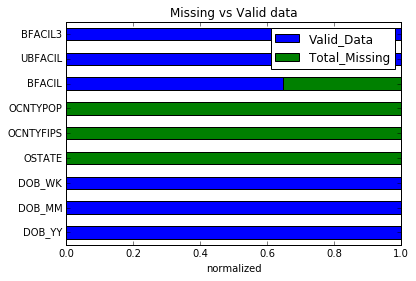

In [14]:
#Missing vs valid data for attributes related to infant birth place, time, facility
check_missingData(0,9)

# Look if reason behind missing data is systemic (not random) 

The attributes OCNTYPOP, OCNTYFIPS,OSTATE do not have valid data as the CDC excluded those attributes in the 
publicly available raw data.The attribute BFACIL (Birth of place) has missing values because it was added in the 2003
revised version of the US Standard Certificate of Live Birth and Certificate of Death. Many states still used the 1989
US Standard Certificate of Live Birth and Certificate of Death (UBFACIL). BFACIL has additional options of home (intended), home (unintended), and home (unknown).

In [17]:
data_2008['OCNTYPOP'].head()

0     
1     
2     
3     
4     
Name: OCNTYPOP, dtype: object

Write a function that takes a list of attributes with 100% missing data and removes them from the data set

In [18]:
def rem_zeroDataAtt(my_df,mylist):
    for ZeroDataAtt in mylist:
        my_df = my_df.drop(['%s' % ZeroDataAtt],1)
    return my_df

In [19]:
mylist = ['OCNTYPOP', 'OCNTYFIPS','OSTATE']
new_aa = rem_zeroDataAtt(data_2008,mylist)

Check the dimension of the data after removing the three columns

In [20]:
new_aa.shape

(4255188, 179)

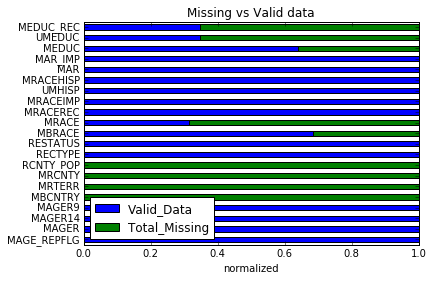

In [21]:
#Missing vs valid data for attributes related to mother's age, race, hispanic origin, marital status, and education
check_missingData(10,31)

The attributes RCNTY_POP (Mother's county of residence population), MRCNTY (Mother's county of residence),MRTERR (Mother's residence), and MBCNTRY (Mother's birth country) do not have valid data as the CDC excluded those attributes in the publicly available raw data. Remove these columns from the dataframe.

In [23]:
mylist = ['RCNTY_POP', 'MRCNTY','MBCNTRY', 'MRTERR']
new_aa = rem_zeroDataAtt(new_aa,mylist)

The attributes MEDUC_REC, UMEDUC, MEDUC, MRACE, MBRACE have a substantial amount of data missing. Look if there is any 
pattern. Those source of the data comes from states that use unrevised (U), revised (R), or combination of both (UR). 
Look if that could be the reason for the missing data.

Add a column of "Revision" to 'exploration_2008.txt' and load it

In [24]:
data_completeness_new = pd.read_csv('exploration_2008.txt',delim_whitespace=True)
data_completeness_new.head()

,Column,Type,Invalid,Empty,EmptyWithMean,Not_Stated,unknown,Total_Missing,NotApplicable,Total,Revision
0,DOB_YY,nominal,66,33,0,0,0,99,0,4255188,UR
1,DOB_MM,nominal,0,99,0,0,0,99,0,4255188,UR
2,DOB_WK,nominal,0,99,0,0,0,99,0,4255188,UR
3,OSTATE,nominal,0,4255188,0,0,0,4255188,0,4255188,UR
4,OCNTYFIPS,nominal,55,4255133,0,0,0,4255188,0,4255188,UR


In [25]:
data_completeness = data_completeness_new[data_completeness_new.Revision=='UR']
data_completeness.shape
#check_missingData(1,25)

(72, 11)

In [26]:

#data_completeness = data_completeness_new.drop(data_completeness_new.index[['OCNTYPOP', 'OCNTYFIPS','OSTATE']])
data_completeness = data_completeness.set_index(['Column'])
data_completeness = data_completeness.loc[~ data_completeness.index.isin(['OCNTYPOP', 'OCNTYFIPS','OSTATE','RCNTY_POP', 'MRCNTY','MBCNTRY', 'MRTERR'])]
data_completeness = data_completeness.reset_index()
data_completeness.shape

(66, 11)

Plot attributes which are in both the revised and unrevised version of the live birth certificate

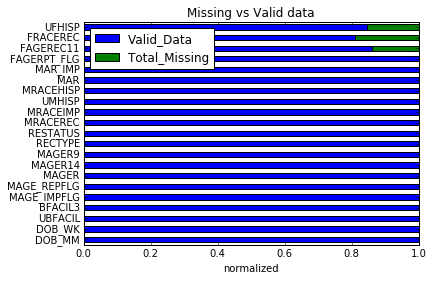

In [27]:
check_missingData(1,22)

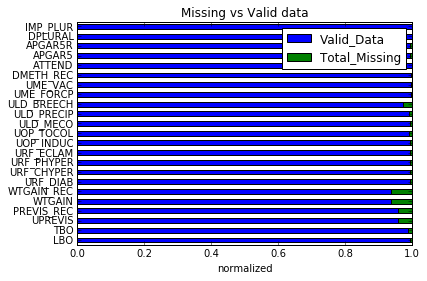

In [28]:
check_missingData(23,46)

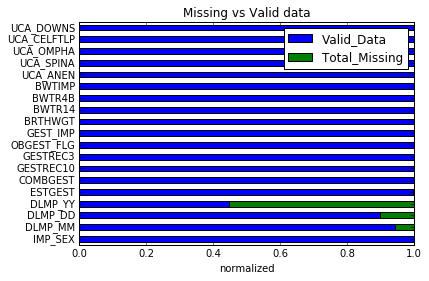

In [29]:
check_missingData(47,66)

The plots show, attributes that appear in both the revised and unrevised certificate (revision code UR), have near complete data with little missing values.

Now, let's look at the attributes which appear in the unrevised certificate version only

In [45]:
data_completeness = data_completeness_new[data_completeness_new.Revision=='U']
data_completeness.shape

(16, 11)

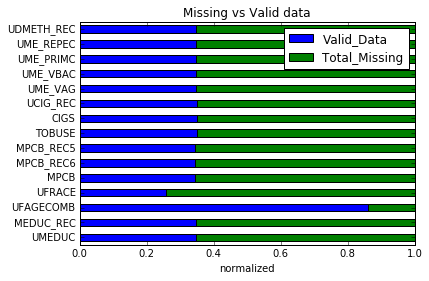

In [46]:
#Missing vs valid data for attributes related to father's age, race, and hispanic origin
check_missingData(1,16)

The plots show more than 60% of data is missing for attributes that appear in the unrevised version only

Now, lets look at the attributes that appear in the revised verstion (Revision R) only

In [47]:
data_completeness = data_completeness_new[data_completeness_new.Revision=='R']
data_completeness.shape

(65, 11)

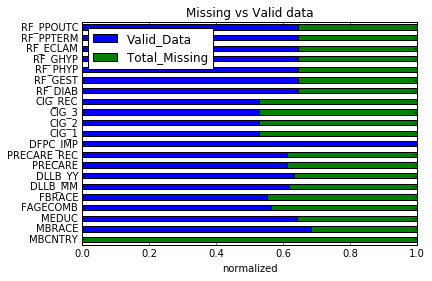

In [48]:
#Missing vs valid data for attributes related to live birth history
check_missingData(1,22)

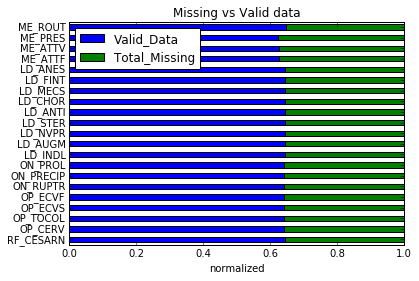

In [49]:
#Missing vs valid data for attributes related to prenatal care visits and weight gain history
check_missingData(23,44)

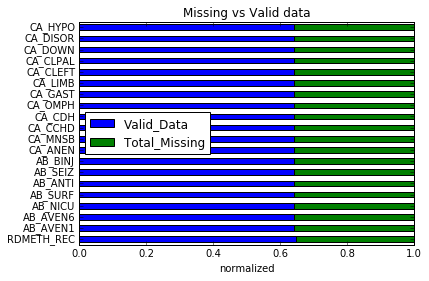

In [50]:
#Missing vs valid data for attributes related to cigarete and tobacco use
check_missingData(45,65)

The plots show more than 30% of data is missing for most of the attributes that appear in the revised version

### Natality Vs infant fatality

The file has a flag which identifies an infant death (FLGND = 1). Lets look at the ratio of infant fatality

In [36]:
values_dict['FLGND']

{' ': 99, '1': 27523, '2': 4227566}

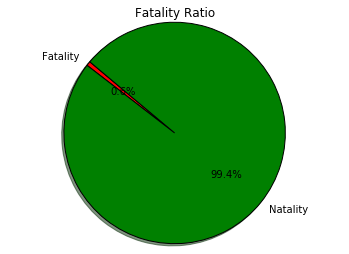

In [37]:
labels = 'Fatality', 'Natality'
sizes = [27523, 4227566 ]
colors = ['red','green']
 
# Plot
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.title('Fatality Ratio')
plt.show()

In [38]:
apgar = new_aa[["FLGND","APGAR5"]]


In [127]:
#new_aa[["FLGND","APGAR5"]].groupby(["FLGND","APGAR5"]).size().plot(kind='bar')


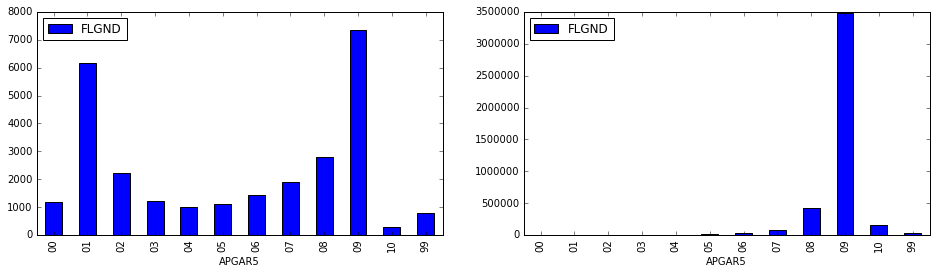

In [125]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
apgar[apgar.FLGND == '1'][['FLGND','APGAR5']].groupby(['APGAR5']).count().plot(kind='bar',ax= ax1,figsize=(16,4))
apgar[apgar.FLGND == '2'][['FLGND','APGAR5']].groupby(['APGAR5']).count().plot(kind='bar',ax = ax2,figsize=(16,4))


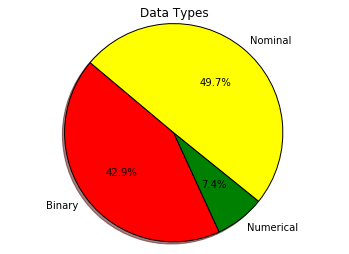

In [112]:
 # Data to plot
labels = 'Binary', 'Numerical', 'Nominal'
sizes = [70, 12, 81]
colors = ['red','green', 'yellow']
#explode = (0.1, 0, 0, 0,0)  # explode 1st slice
 
# Plot
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Data Types') 
plt.axis('equal')
plt.show()